In [1273]:
# 导入依赖
import numpy as np
import matplotlib.pyplot as plt

In [1274]:
# 渲染图设定
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [1275]:
# 读取 file 的 method
def read_input(f):
    input_data = f.read().split('\n')
    output_data = []
    for item in input_data: # 将数据转化为 float 的一笔笔点资料（x1, x2, class）
        sub_str = item.split(',')
        # print(sub_str,end='\n\n')
        for _str in sub_str:
            value = float(_str)
            output_data.append(value)
    output_data = np.reshape(output_data,(len(output_data)//3,3))

    return output_data

In [1276]:
# traning data 读取 转化
f_train = open('Iris_training.txt','r')
traning_data = read_input(f_train)
f_train.close()
# testing data 读取 转化
f_test = open('Iris_test.txt','r')
test_data = read_input(f_test)
f_test.close()


In [1277]:
train_points = traning_data
test_points = test_data

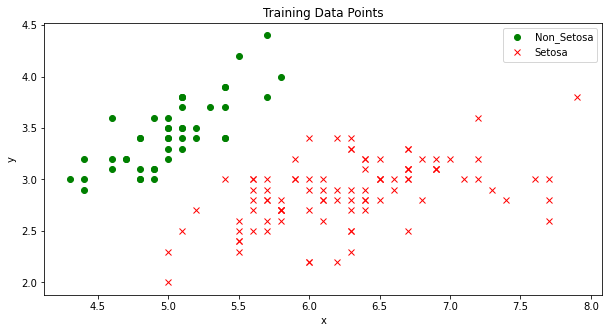

In [1278]:
pass_point = []
fail_point = []
for point in train_points:
    if point[2] >= .0:
        pass_point.append(point[0])
        pass_point.append(point[1])
    else :
        fail_point.append(point[0])
        fail_point.append(point[1])

pass_point = np.reshape(pass_point,(len(pass_point)//2,2))
fail_point = np.reshape(fail_point,(len(fail_point)//2,2))

plt.plot(pass_point[:,0],pass_point[:,1] ,'go' , label='Non_Setosa')
plt.plot(fail_point[:,0],fail_point[:,1] ,'rx' , label='Setosa')
plt.title("Training Data Points")
plt.ylabel('y') 
plt.xlabel('x') 
plt.legend()
plt.show()

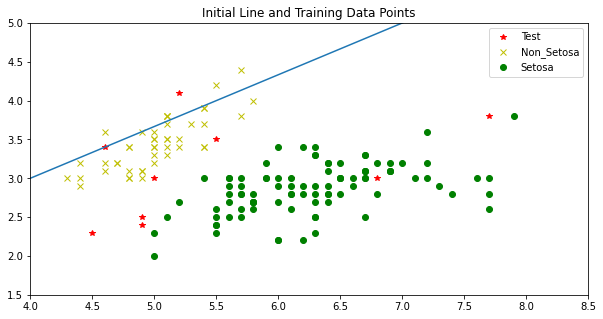

In [1279]:
# 初始参数
w_1 = 2.0
w_2 = -3.0
b = 1.0
line_x = np.arange(-100,100, 1.0)
# print(line_x)
# x * w_1 + y * w_2 + b = 0
line_y = - ((line_x * w_1 + b) / w_2)
plt.plot(test_points[:,0], test_points[:,1] ,'r*', label='Test')
plt.plot(pass_point[:,0],pass_point[:,1] ,'yx', label='Non_Setosa')
plt.plot(fail_point[:,0],fail_point[:,1] ,'go', label='Setosa')

range_x_left, range_y_left = 4,1.5
range_x_right, range_y_right = 8.5,5
plt.title("Initial Line and Training Data Points")
plt.xlim([range_x_left, range_x_right]) 
plt.ylim([range_y_left, range_y_right]) 
plt.plot(line_x,line_y)
plt.legend()
plt.show()


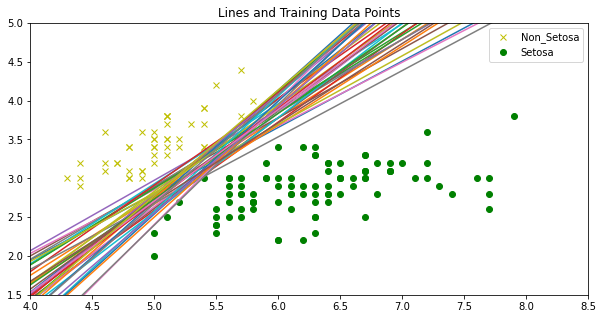

In [1280]:
base_rate = 0.02 # 学习速率
epoch_start = 1
max_epoch = 100 # 设置最大世代
iteration_time = 40 # 不同学习速率测试次数

# 用于取 w1, w2, b 的平均值, 存放所有测试情况下 w1, w2, b 的和
w1_sum = 0.0 
w2_sum = 0.0
b_sum = 0.0
final_w_1 = 0.0 # 最终 w_1 解
final_w_2 = 0.0 # 最终 w_2 解
b = 0.0 # 最终 b 解

for x in range(1, iteration_time):
    w = np.reshape([w_1,w_2],(2,1)) # 初始化 vector
    rate = base_rate * x
    for epoch in range(epoch_start,max_epoch):
        finished = True
        for index in range(len(train_points)) : # 遍历每一个资料，将 guess_class 和 true_class 比较
            ans = np.linalg.multi_dot([train_points[index,:2],w]) + b
            # print('point: ', train_points[index,:2] ,'\nw: \n', w ,'\nb: ', b  ,'\nans:', ans[0], '\n\n')
            check = (ans[0] * train_points[index, 2] >= 0.0) # 检查猜的 class 是否正确（是否同号）
            if check == False:
                finished = False # 如果有错误代表还没完成
                step = train_points[index, 2] * rate 
                # 更新 w 和 b
                change = np.multiply(train_points[index,:2], step)
                w += np.reshape(np.multiply(train_points[index,:2], step),(2,1))
                b += step 
        if finished == True: 
            break
    final_w_1 = w[0,0]
    final_w_2 = w[1,0]
    w1_sum += w[0,0]
    w2_sum += w[1,0]
    b_sum += b

    if x == 1:
        plt.plot(pass_point[:,0],pass_point[:,1] ,'yx', label='Non_Setosa')
        plt.plot(fail_point[:,0],fail_point[:,1] ,'go', label='Setosa')
    
    line_y = - ((line_x * final_w_1 + b) / final_w_2)
    plt.plot(line_x,line_y)
# plt.title("Final Line and Points in rate: %s, at epoch: %s " %(rate,epoch))
plt.title("Lines and Training Data Points")
plt.xlim([range_x_left, range_x_right]) 
plt.ylim([range_y_left, range_y_right]) 
plt.legend() 
plt.show() 

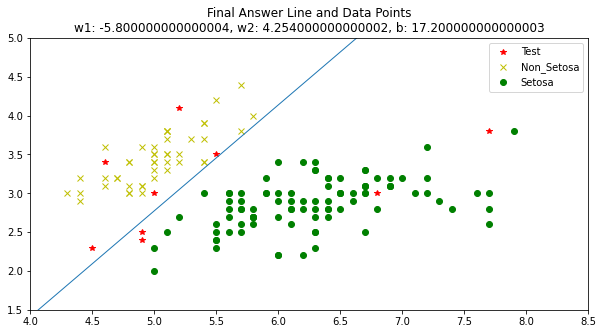

In [1281]:
# 计算平均 w1, w2, b
w_1_average = w1_sum / iteration_time
w_2_average = w2_sum / iteration_time
b_average = b_sum / iteration_time

# 采用平均值方案
w = np.reshape([w_1_average,w_2_average],(2,1)) # 初始化 vector
final_w_1 = w_1_average
final_w_2 = w_2_average
b = b_average

plt.plot(test_points[:,0], test_points[:,1] ,'r*', label='Test')
plt.plot(pass_point[:,0],pass_point[:,1] ,'yx', label='Non_Setosa')
plt.plot(fail_point[:,0],fail_point[:,1] ,'go', label='Setosa')
plt.title("Final Answer Line and Data Points\nw1: %s, w2: %s, b: %s" %(final_w_1, final_w_2, b))
plt.xlim([range_x_left, range_x_right]) 
plt.ylim([range_y_left, range_y_right]) 
line_y = - ((line_x * final_w_1 + b) / final_w_2)
plt.plot(line_x,line_y ,linewidth=1)
plt.legend()
plt.show()

In [1282]:
false_count = 0
for index in range(len(test_points)) :
    ans = np.linalg.multi_dot([test_points[index, :2],w]) + b
    check = (ans[0] * test_points[index,2] >= 0.0) # 检查猜的 class 是否正确（是否同号）
    if check == False:
        false_count +=1
print('w_1_average: ',w_1_average)
print('w_2_average: ',w_2_average)
print('b_average: ',b_average)
print('正确率: ',np.round(((len(test_data) - false_count) / len(test_data)) * 100.0,4),'%' )


w_1_average:  -3.172550000000001
w_2_average:  2.678300000000001
b_average:  8.603000000000003
正确率:  100.0 %
